In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("../")
from epitools import get_data

In [34]:
gdf_ca = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/canada.geojson")
gdf_ca = gdf_ca.rename(columns={"name": "state"})
gdf_ca["state"] = gdf_ca["state"].replace({"Yukon Territory": "Yukon"})	
df_ca = get_data(
    country="Canada",
    year=2021,
    aggregation="state",
    election="federal",
    method="nv"
)
data_ca = pd.merge(gdf_ca, df_ca, on="state")
data_ca

,state,cartodb_id,created_at,updated_at,geometry,epi,epi_between,epi_within,year
0,Quebec,1,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-78.01917 62.59193, -77.86722 ...",0.921992,0.723922,0.198071,2021
1,Newfoundland and Labrador,5,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ...",0.911681,0.736675,0.175006,2021
2,British Columbia,6,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-131.07710 52.15009, -130.9481...",0.876779,0.746556,0.130223,2021
3,Nunavut,12,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-109.97841 78.67106, -109.4053...",0.903515,0.776270,0.127245,2021
4,Northwest Territories,13,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-110.39440 78.75221, -109.9784...",0.908673,0.813053,0.095620,2021
5,New Brunswick,7,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-64.48277 47.91777, -64.51472 ...",0.840278,0.729093,0.111185,2021
6,Nova Scotia,2,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-60.91028 45.54610, -61.00028 ...",0.811088,0.685808,0.125280,2021
7,Saskatchewan,3,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-102.00170 59.99992, -102.0009...",0.818402,0.677337,0.141065,2021
8,Alberta,4,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-114.06030 49.00000, -114.0353...",0.833838,0.703583,0.130255,2021
9,Prince Edward Island,8,2014-10-16 13:22:00+00:00,2014-10-16 13:22:00+00:00,"MULTIPOLYGON (((-63.98917 46.39361, -64.13501 ...",0.831052,0.779125,0.051926,2021


In [4]:
gdf_mx = gpd.read_file("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")
gdf_mx = gdf_mx.rename(columns={"state_code": "state_id"})

df_mx = get_data(
    country="Mexico",
    year=2018,
    aggregation="state_id",
    election="first_round",
    method="nv"
)
df_mx["state_id"] = df_mx["state_id"].astype(int)

data_mx = pd.merge(gdf_mx, df_mx, on="state_id")

In [16]:
gdf_us = gpd.read_file(f"https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
gdf_us = gdf_us.rename(columns={"name": "state"})
gdf_us["state"] = gdf_us["state"].str.upper()

df_us = get_data(
    country="United States",
    year=2020,
    aggregation="state",
    election="first_round",
    method="nv"
)
data_us = pd.merge(gdf_us, df_us, on="state")

In [35]:
data = pd.concat([data_us, data_mx, data_ca])
data = data[data["state"] != "DISTRICT OF COLUMBIA"]

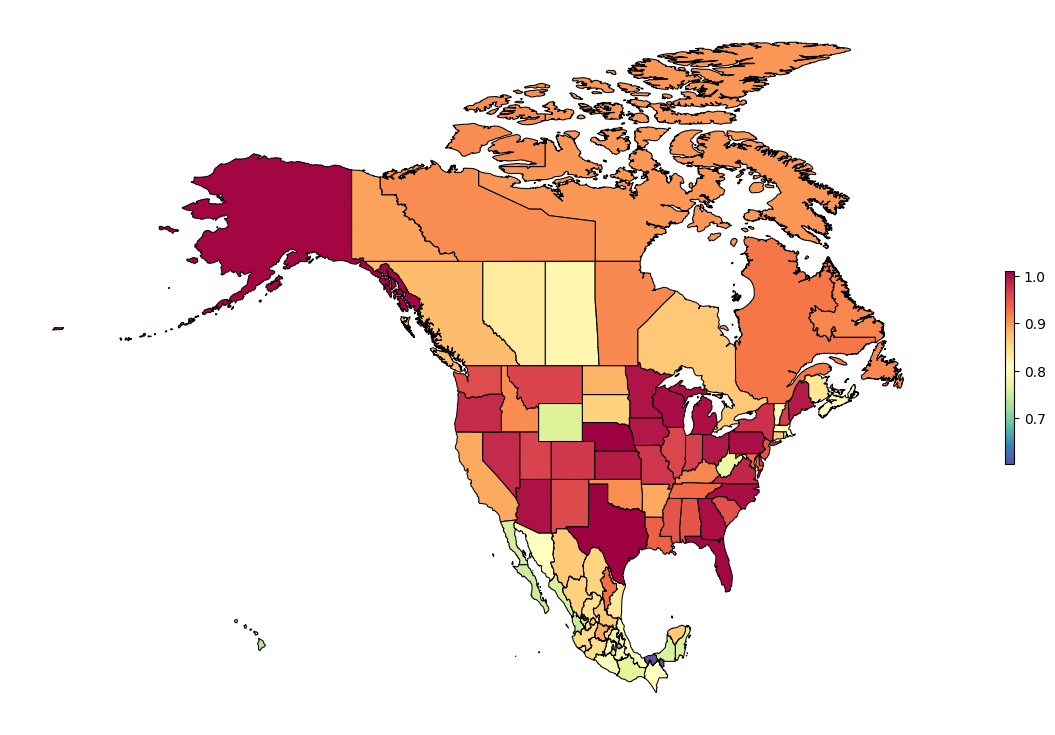

In [40]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

data.plot(
    column="epi",
    edgecolor="black",
    lw=0.75,
    # vmin=0.7,
    cmap="Spectral_r",
    legend=True, 
    legend_kwds=dict(
        shrink=0.25
    ),
    ax=ax
)

ax.axis("off")
fig.tight_layout()